In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/CoilData.csv")
#df

In [3]:
#Reading Seperate CSV files

dfb4 = "data/SignalExport/400442B4.csv"
dfb5 = "data/SignalExport/400442B5.csv"


def read_single_csv(filename):

    with open(filename) as f:
        data = f.read()

    #Split values in lengthpoints & values
    data = data.split(":;")[1].split("Values")
    length = data[0].split(";")
    width = data[1].split(";")

    #Remove empty values & turn data into floats instead of strings
    length = [x for x in length if x]
    length = [float(x) for x in length]
    width = [x for x in width if x]
    width = [float(x) for x in width]

    
    #Put the data into a dataframe
    df = pd.DataFrame()
    df['length'] = length
    df['width'] = width


    #Remove leading zeros & cut off first measurements 
    df = (df[df['width'] != 0])
    df = df[(df['length'] >= 45) ]
    return df


In [4]:
b4 = read_single_csv(dfb4)
b5 = read_single_csv(dfb5)

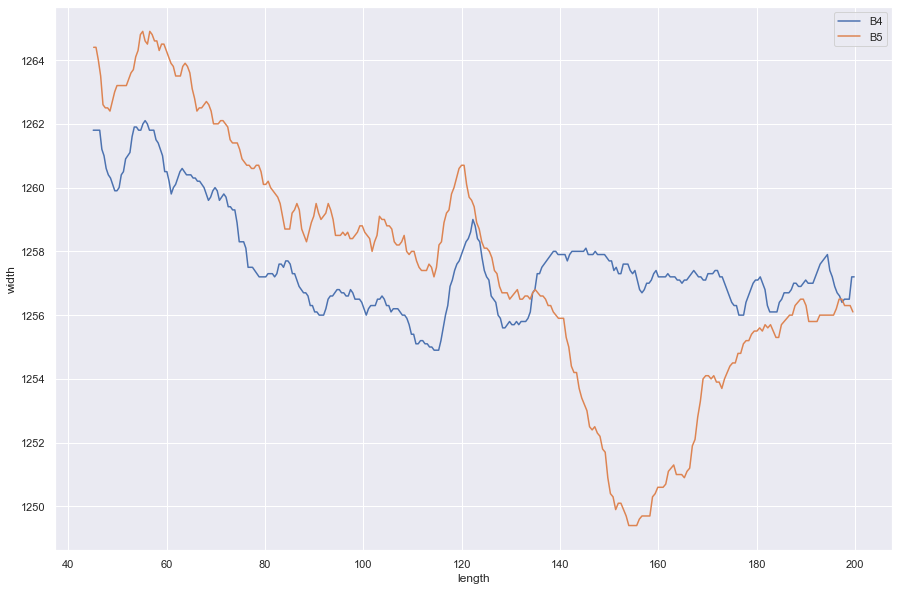

In [5]:
#Plot Data 
sns.set(rc={'figure.figsize':(15,10)})
plt.figure()
sns.lineplot(data=b4,x='length',y='width',label='B4')
g = sns.lineplot(data=b5,x='length',y='width',label='B5')
#g.axhline(b4.quantile(.1).width,c='r')

<Figure size 1080x720 with 0 Axes>

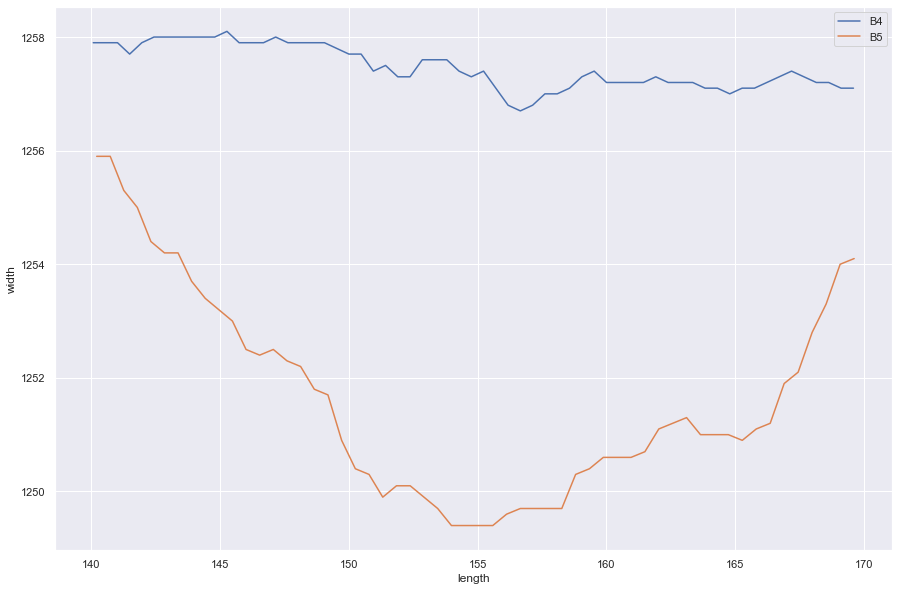

In [6]:
def min_plot(b4,b5):
    plt.figure()
    _b4 = b4[(b4['length'] >= 140) & (b4['length'] <= 170)]
    _b5 = b5[(b5['length'] >= 140) & (b5['length'] <= 170)]
    plt.figure()
    #treshold = _b4.quantile(.1).width
    sns.lineplot(data=_b4,x='length',y='width',label='B4')
    sns.lineplot(data=_b5,x='length',y='width',label='B5')
    #g.axhline(treshold,c='r')
    #_b4.describe()
    #print(b4)
    #print(b5)
min_plot(b4,b5)

In [7]:
def calculate_constriction(B4,B5):

    _B4 = B4[(B4['length'] >= 140) & (B4['length'] <= 170)]
    _B5 = B5[(B5['length'] >= 140) & (B5['length'] <= 170)]
    
    _B4 = _B4.copy()
    _B5 = _B5.copy()
    
    
    TRESHOLD = 5
    #Calculate the difference in witdh between B5 and its nearest point in B4
    _B5['dif'] = _B5.apply(lambda x:(_B4.loc[_B4['length'].sub(x.length).abs().idxmin()][1]) - x.width,axis=1)
    
    #Check if any of the differences exceed the treshold
    _B5['exceed'] = _B5.apply(lambda x: x.dif >= TRESHOLD,axis=1)
    _B5 = _B5[_B5['exceed'] == True]
    
    if(_B5.empty):
        return False
    
    return True
    

calculate_constriction(b4,b5)   

True

In [8]:
df = pd.read_csv("data/CoilData.csv")
coils = df.coil.tolist()

for i in range(len(coils)):
    df = df.copy()
    try:
        b4file = f"data/SignalExport/{str(coils[i])}B4.csv"
        b5file = f"data/SignalExport/{str(coils[i])}B5.csv"
        
        b4 = read_single_csv(b4file)
        b5 = read_single_csv(b5file)
        
        #min_plot(b4,b5)
        
        df.iloc[i]['constriction'] = calculate_constriction(b4,b5)
    
    #print(calculate_constriction(b4,b5))
    except:
        df.iloc[i]['constriction'] = "Error"
    
    
df


C:\Users\Frede\anaconda3\lib\site-packages\pandas\core\series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()
C:\Users\Frede\anaconda3\lib\site-packages\pandas\core\indexing.py:1724: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer_missing(indexer, value)
